In [88]:
import pandas as pd
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from nltk.tokenize import word_tokenize
import string
from nltk import word_tokenize, ngrams

In [89]:
# Đường dẫn đến file JSON của bạn
file_path = 'C:\\Users\\ADMIN\\Desktop\\Webmining Dataset\\dev.json'
df = pd.read_json(file_path)

#Read top 5 examples
df_combined = df[['comment', 'text_label']].head(5)
print(df_combined)

  comment                                                      text_label                                                  
0  Homestay thoáng, đẹp, view xịn, anh chủ nhiệt tinh hỗ tr...                     [Service#Positive, Public_area#Positive]
1  Phòng quá bẩn, khách sạn siêu siêu cũ, bẩn thỉu hôi hám ...                        [Room#Negative, Public_area#Negative]
2       Hiện trạng phòng không hợp lý 500k/night. Phòng hơi cũ                                              [Room#Negative]
3  Khách sạn sạch sẽ Nhân viên thân thiện, nhiệt tình (đặc ...                            [Food#Positive, Service#Positive]
4  Phòng và view rất đẹp, chụp hình tại Zen là đủ, không cầ...  [Location#Neutral, Food#Positive, Room#Positive, Service...


In [90]:
# Basic Statistics
print(f"Total comments: {len(df)}")
print(f"Unique labels: {df['text_label'].explode().nunique()}")

Total comments: 1000
Unique labels: 18


Sentiment    Positive  Neutral  Negative
Category                                
Facilities    92.0      41.0     50.0   
Food         116.0      47.0     29.0   
Location     232.0      18.0     26.0   
Public_area  201.0      10.0     16.0   
Room         397.0     102.0    104.0   
Service      617.0      11.0     53.0   


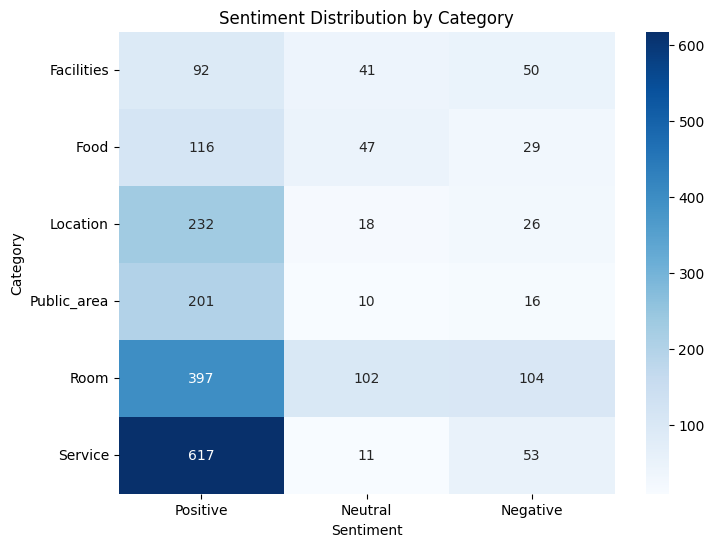

In [91]:
# Create table
label_counts = df['text_label'].explode().value_counts()
label_df = label_counts.reset_index()
label_df.columns = ['Label', 'Count']
label_df[['Category', 'Sentiment']] = label_df['Label'].str.split('#', expand=True)
label_df = label_df.drop(columns=['Label'])
pivot_df = label_df.pivot_table(index='Category', columns='Sentiment', values='Count', fill_value=0)
pivot_df_transposed = pivot_df.T
pivot_df = pivot_df[['Positive', 'Neutral', 'Negative']]
print(pivot_df)

# Create Graph
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_df, annot=True, cmap='Blues', fmt='g')
plt.title('Sentiment Distribution by Category')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()


Number of comments: 1000
Average length of comments (in words): 175.48
Average word count: 39.36


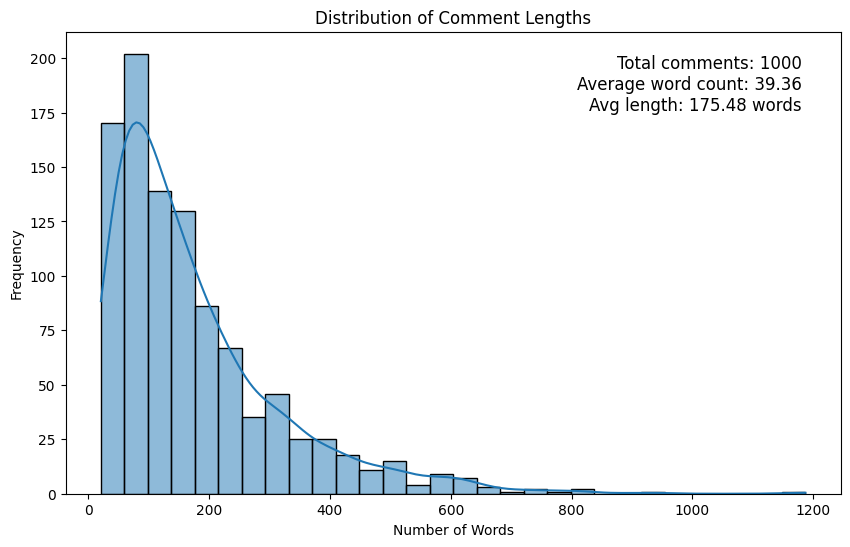

In [92]:
# Calculate statistics
total_comments = len(df)
df['comment_length'] = df['comment'].apply(len)
average_length = df['comment_length'].mean()
average_word_count = df['comment'].apply(lambda x: len(x.split())).mean()

# Display additional statistics
print(f"Number of comments: {total_comments}")
print(f"Average length of comments (in words): {average_length:.2f}")
print(f"Average word count: {average_word_count:.2f}")

# Create Graph
plt.figure(figsize=(10, 6))
sns.histplot(df['comment_length'], bins=30, kde=True)
plt.title('Distribution of Comment Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.text(x=0.95, y=0.95, s=f"Total comments: {total_comments}\n"
                            f"Average word count: {average_word_count:.2f}\n"
                           f"Avg length: {average_length:.2f} words\n",
         fontsize=12, transform=plt.gca().transAxes, 
         verticalalignment='top', horizontalalignment='right')

plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13132\1088626510.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(bigram_labels), y=list(counts), palette='viridis')


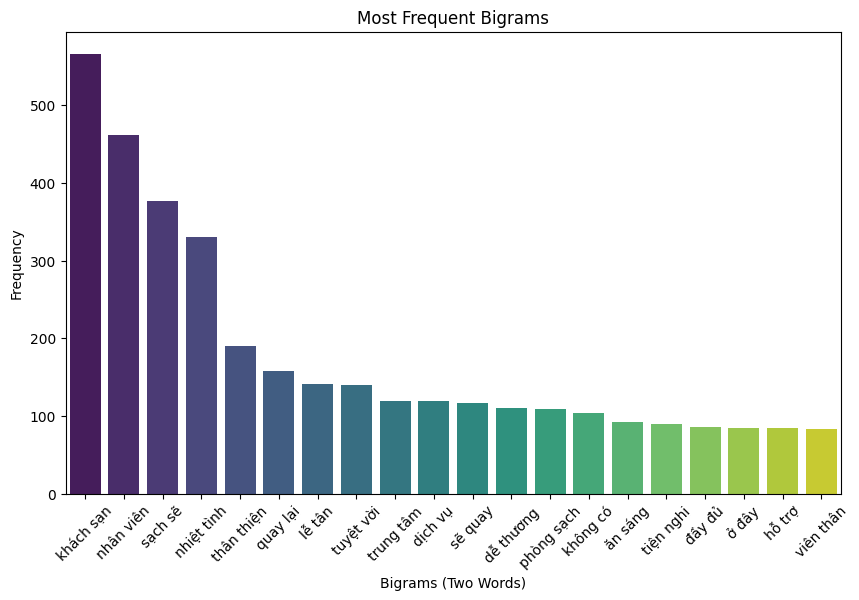

In [93]:
# Word frequency analysis
comments = df['comment'].dropna().tolist()  
all_bigrams = []
for comment in comments:
    tokens = word_tokenize(comment.lower())  # Tokenize and lower the case
    tokens = [word for word in tokens if word not in string.punctuation]
    bigrams = list(ngrams(tokens, 2))  # Generate bigrams (pairs of 2 words)
    all_bigrams.extend(bigrams)
bigram_freq = Counter(all_bigrams)
common_bigrams = bigram_freq.most_common(20)

# Graph
bigrams, counts = zip(*common_bigrams)
bigram_labels = [' '.join(bigram) for bigram in bigrams]

plt.figure(figsize=(10, 6))
sns.barplot(x=list(bigram_labels), y=list(counts), palette='viridis')
plt.title('Most Frequent Bigrams')
plt.xlabel('Bigrams (Two Words)')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()